# Análise Exploratória de Dados Básica - Informações Cadastrais CVM

## 1 - Introdução

<p> O objetivo deste notebook é utilizar ferramentas de análise de dados (notadamente com o auxílio da linguagem python) aplicadas a um tema de interesse específico. O mercado financeiro / de capitais, devido a sua natureza de constante e volumosa produção de dados, é área rica para tais tipos de investigação. </p>
     

<p> Utilizaremos uma pequena fração de dados públicos abertos como fonte de estudo. Tratam-se das informações cadastrais dos fundos de investimento brasileiros regidos pela Instrução CVM 555. A Comissão de Valores Mobiliários (CVM) é o órgão regulador do mercado de capitais e, como tal, emite instruções normativas quanto ao tema, incluindo fundos de investimento. Pode-se encontrar mais informações quanto a ICVM 555 no link <a href="http://www.cvm.gov.br/legislacao/instrucoes/inst555.html">aqui</a>.
    
    
<p> A base de dados fornece informações sobre as classes dos respectivos fundos, a situação, o nome do gestor, administrador, qual o valor do patrimônio líquido, dentre tantas outras que serão melhor exploradas no decorrer deste breve trabalho. </p>
    

<p> Este dataset foi obtido do Portal de Dados Abertos da CVM, onde podem ser encontrados outros conjuntos de dados sobre fundos de investimento 555, fundos estruturados, dados de companhias abertas, entre outros. Para quem se interessa pelo tema, esta é valiosa fonte de informação. </p>
    
    
<p> A seguir, seguem as fontes dos dados utilizadas neste artigo: <p> 
    
    
* Portal Dados Abertos CVM:    

    http://dados.cvm.gov.br/organization/cvm
    
        
* Conjunto de dados 'Fundos de Investimento: Informação Cadastral':

    http://dados.cvm.gov.br/dataset/fi-cad

## 1 - Transformação e limpeza dos dados

<p> Vamos iniciar importando as bibliotecas relevantes: </p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<p> Vale destacar que o arquivo utilizado tem data de 30/04/2020, conforme pode ser visto ao final do url abaixo. Ou seja, toda a análise aqui feita é referente a posição da indústria nesta data. O nome do arquivo pode ser alterado para considerar outras datas e o código gerará informações automaticamente para este outro arquivo, desde que o template do arquivo não mude (por curiosidade, perceba que arquivos datados do mês de Novembro/2019 para trás tinham outro layout, com menor número de colunas, portanto, cuidado!). Já as análises em texto não são dinâmicas, o que significa que estas se aplicam apenas para a posição de 30/04/2020. </p>

<p> Feita esta ressalva, em seguida realizamos o download do arquivo .csv para um dataframe. Utilizamos ";" como separador dos dados, "." como marcador de casa decimal e encoding "latin_1" para que caracteres como "~", "ç", entre outros, sejam corretamente processados. Apresentamos então os 5 primeiros registros utilizando o método .head(). </p>

In [2]:
url = "http://dados.cvm.gov.br/dados/FI/CAD/DADOS/inf_cadastral_fi_20200430.csv"

info_cadastral_555 = pd.read_csv(url, sep =';', decimal = '.', encoding = 'latin_1')
info_cadastral_555.head()

,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,DT_INI_EXERC,DT_FIM_EXERC,...,ADMIN,PF_PJ_GESTOR,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR
0,36.498.416/0001-29,03 FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE...,2020-04-09,2020-04-09,NaN,EM FUNCIONAMENTO NORMAL,2020-04-27,2020-04-27,2020-04-27,2020-06-30,...,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,PJ,09.428.261/0001-81,O3 GESTÃO DE RECURSOS LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
1,36.729.776/0001-94,03 MASTER FUNDO DE INVESTIMENTO EM ACOES,2020-04-08,2020-04-08,NaN,FASE PRÉ-OPERACIONAL,2020-04-08,NaN,NaN,NaN,...,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,PJ,09.428.261/0001-81,O3 GESTÃO DE RECURSOS LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
2,36.499.643/0001-79,03 MASTER FUNDO DE INVESTIMENTO MULTIMERCADO,2020-04-09,2020-04-09,NaN,EM FUNCIONAMENTO NORMAL,2020-04-27,2020-04-27,2020-04-27,2020-06-30,...,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,PJ,09.428.261/0001-81,O3 GESTÃO DE RECURSOS LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
3,36.016.411/0001-12,051 ALLOCATION FUNDO EM COTAS DE FUNDOS DE INV...,2020-04-03,2020-04-02,NaN,FASE PRÉ-OPERACIONAL,2020-04-02,NaN,NaN,NaN,...,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,PJ,30.193.705/0001-33,ZERO CINCO UM CAPITAL GESTÃO DE RECURSOS LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
4,33.913.620/0001-70,051 BRUCUTU FUNDO DE INVESTIMENTO MULTIMERCADO...,2019-07-19,2019-06-04,NaN,EM FUNCIONAMENTO NORMAL,2019-08-05,2019-08-05,2019-08-05,2020-05-31,...,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITUL...,PJ,30.193.705/0001-33,ZERO CINCO UM CAPITAL GESTÃO DE RECURSOS LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S,62.318.407/0001-19,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITUL...,62.318.407/0001-19,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITUL...


<p> É possível observar que o arquivo traz considerável quantidade de dados. Nosso objetivo até o final deste notebook é obter um profundo entendimento sobre os mesmos e, consequentemente, obter um panorama atual da indústria de fundos de investimento brasileira. 
    
<p> Vamos identificar quais os atributos (colunas da tabela) sobre os fundos (registros ou linhas da tabela) o arquivo fornece com o código a seguir: </p>

In [3]:
pd.DataFrame(info_cadastral_555.columns, columns = ["Colunas"])

,Colunas
0,CNPJ_FUNDO
1,DENOM_SOCIAL
2,DT_REG
3,DT_CONST
4,DT_CANCEL
5,SIT
6,DT_INI_SIT
7,DT_INI_ATIV
8,DT_INI_EXERC
9,DT_FIM_EXERC


<p> Com o método .info() a seguir é possível obter um resumo interessante sobre a estrutura de nosso dataset. </p>

In [4]:
info_cadastral_555.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36775 entries, 0 to 36774
Data columns (total 36 columns):
CNPJ_FUNDO          36775 non-null object
DENOM_SOCIAL        36775 non-null object
DT_REG              36775 non-null object
DT_CONST            36775 non-null object
DT_CANCEL           17611 non-null object
SIT                 36773 non-null object
DT_INI_SIT          36773 non-null object
DT_INI_ATIV         34294 non-null object
DT_INI_EXERC        34053 non-null object
DT_FIM_EXERC        34053 non-null object
CLASSE              36772 non-null object
DT_INI_CLASSE       36772 non-null object
RENTAB_FUNDO        30008 non-null object
CONDOM              36771 non-null object
FUNDO_COTAS         36775 non-null object
FUNDO_EXCLUSIVO     36773 non-null object
TRIB_LPRAZO         28218 non-null object
INVEST_QUALIF       36772 non-null object
TAXA_PERFM          21969 non-null float64
INF_TAXA_PERFM      2444 non-null object
TAXA_ADM            22179 non-null float64
INF_TAXA

<p> Podemos observar que se trata de dataset com 36 colunas (atributos) e 36.775 linhas (registros), o qual ocupa pouco mais de 10 MB de espaço de memória. Além disso, obtemos a listagem com o nome das colunas, a quantidade de registros não-nulos naquela coluna específica e seu respectivo tipo de dado. "Object" em geral se referem a colunas texto e "float64" referem-se a colunas com dados numéricos não-inteiros, com casas decimais.</p>
    
<p> Por exemplo, a coluna "CNPJ_FUNDO" armazena dados em texto (object) e contém 36.464 registros não nulos. Isto quer dizer, portanto, que a mesma não apresenta valores em branco / nulos, visto que o total de registros no dataset é de igualmente 36.464. </p>
    
<p> Ao final da tabela é possível observar que a mesma é composta por 3 colunas com dados numéricos (float64) e 33 com dados de texto (object). </p>

<p> Apesar de já bastante informativo, podemos tratar este dataset para que o mesmo no traga informações de maior qualidade. </p>

<p> Ainda no Portal de Dados Abertos da CVM é possível obter o "Dicionário de Dados" para o arquivo analisado. O mesmo apresenta descrição detalhada, tipo de dados e tamanho de cada coluna do dataset. Tal dicionário pode ser encontrado <a href="http://dados.cvm.gov.br/dados/FI/CAD/META/meta_inf_cadastral_fi.txt">aqui</a>. </p>


<p> Na linha de código a seguir, vamos renomear as colunas do nosso conjunto de dados e alterar os tipos de dados das mesmas para que reflitam a estrutura do dicionário de dados. </p>

In [5]:
tipos_colunas = {'CNPJ_FUNDO':'object','DENOM_SOCIAL':'object','DT_REG':'datetime64','DT_CONST':'datetime64', 'DT_CANCEL':'datetime64', 'SIT':'object', 'DT_INI_SIT':'datetime64', 'DT_INI_ATIV':'datetime64', 'DT_INI_EXERC':'datetime64', 'DT_FIM_EXERC':'datetime64', 'CLASSE':'object', 'DT_INI_CLASSE':'datetime64', 'RENTAB_FUNDO':'object', 'CONDOM':'object', 'FUNDO_COTAS':'object', 'FUNDO_EXCLUSIVO':'object', 'TRIB_LPRAZO':'object', 'INVEST_QUALIF':'object', 'TAXA_PERFM':'float64', 'INF_TAXA_PERFM':'object', 'TAXA_ADM':'float64', 'INF_TAXA_ADM':'object', 'VL_PATRIM_LIQ':'float64', 'DT_PATRIM_LIQ':'datetime64', 'DIRETOR':'object', 'CNPJ_ADMIN':'object', 'ADMIN':'object', 'PF_PJ_GESTOR':'object', 'CPF_CNPJ_GESTOR':'object', 'GESTOR':'object', 'CNPJ_AUDITOR':'object', 'AUDITOR':'object', 'CNPJ_CUSTODIANTE':'object', 'CUSTODIANTE':'object', 'CNPJ_CONTROLADOR':'object', 'CONTROLADOR':'object'}

nomes_colunas = {'CNPJ_FUNDO':'CNPJ do fundo', 'DENOM_SOCIAL':'Denominação Social','DT_REG':'Data de registro', 'DT_CONST':'Data de constituição', 'DT_CANCEL':'Data de cancelamento','SIT':'Situação','DT_INI_SIT':'Data início da situação', 'DT_INI_ATIV':'Data de início de atividade', 'DT_INI_EXERC':'Data início do exercício social', 'DT_FIM_EXERC':'Data fim do exercício social', 'CLASSE':'Classe', 'DT_INI_CLASSE':'Data de início na classe', 'RENTAB_FUNDO':'Forma de rentabilidade do fundo (indicador de desempenho)', 'CONDOM':'Forma de condomínio', 'FUNDO_COTAS':'Fundo de cotas?', 'FUNDO_EXCLUSIVO':'Fundo exclusivo?', 'TRIB_LPRAZO':'Tributação de longo prazo?', 'INVEST_QUALIF':'Investidor Qualificado?', 'TAXA_PERFM':'Taxa de performance', 'INF_TAXA_PERFM':'Informações Adicionais (Taxa de performance)', 'TAXA_ADM':'Taxa de administração', 'INF_TAXA_ADM':'Informações Adicionais (Taxa de administração)', 'VL_PATRIM_LIQ':'Valor do patrimônio líquido', 'DT_PATRIM_LIQ':'Data do patrimônio líquido', 'DIRETOR':'Nome do Diretor Responsável', 'CNPJ_ADMIN':'CNPJ do Administrador', 'ADMIN':'Nome do Administrador', 'PF_PJ_GESTOR':'PF / PJ?', 'CPF_CNPJ_GESTOR':'Código de identificação do gestor CPF/CNPJ', 'GESTOR':'Nome do Gestor', 'CNPJ_AUDITOR':'CNPJ do Auditor', 'AUDITOR':'Nome do Auditor', 'CNPJ_CUSTODIANTE':'CNPJ do Custodiante', 'CUSTODIANTE':'Nome do Custodiante', 'CNPJ_CONTROLADOR':'CNPJ do Controlador', 'CONTROLADOR':'Nome do Controlador'}
                                             
info_cadastral_555 = info_cadastral_555.astype(tipos_colunas)    
info_cadastral_555 = info_cadastral_555.rename(columns=nomes_colunas)
    
info_cadastral_555.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36775 entries, 0 to 36774
Data columns (total 36 columns):
CNPJ do fundo                                                36775 non-null object
Denominação Social                                           36775 non-null object
Data de registro                                             36775 non-null datetime64[ns]
Data de constituição                                         36775 non-null datetime64[ns]
Data de cancelamento                                         17611 non-null datetime64[ns]
Situação                                                     36773 non-null object
Data início da situação                                      36773 non-null datetime64[ns]
Data de início de atividade                                  34294 non-null datetime64[ns]
Data início do exercício social                              34053 non-null datetime64[ns]
Data fim do exercício social                                 34053 non-null datetime64[ns]
Class

<p> Ao comparar o output deste método .info() com o anterior, podemos constatar que o nome das colunas assim exposto é mais claro / auto-explicativo, nos ajudando assim na sequência de nossa análise. Ademais, nota-se que agora 9 das colunas apresentam tipo de dados como "datetime64". São colunas referentes a datas que inicialmente o python decodificou ou "entendeu" como texto e que alteramos em seguida. </p>
    
<p> Um último destaque antes de avançarmos é que poderíamos ter indicado, logo quando lemos o arquivo através do método .read_csv(), parâmetros de tipo (dtype = [] ou {:}) e nome (names = []) das colunas, assim como a indicação daquelas que deveriam ser lidas como datas (parse_dates = []). Optamos pela abordagem feita para fins de melhor explicação do processo. </p> 
    
<p> Nosso conjunto de dados agora está melhor formatado e está pronto para a etapa seguinte. </p>

## 3 - Análise exploratória dos dados

### 3.1 - Todas as variáveis

<p> Nesta seção iremos nos aprofundar quanto aos possíveis insights de cada coluna em separado. </p>

<p> Apesar do método .info() utilizado anteriormente nos mostrar o valor absoluto de registros não-nulos para cada coluna, em geral também é informativo apresentar este dado como uma porcentagem do total de registros. </p>

<p> É isto o que faremos no código a seguir: </p>

In [6]:
valores_ausentes = pd.DataFrame(columns = ['Quantidade', 'Percentual %'], index = info_cadastral_555.columns)

for coluna in info_cadastral_555.columns:
    valores_ausentes.loc[coluna, 'Percentual %'] = (1 - (info_cadastral_555[coluna].count() / 
                                                         info_cadastral_555[coluna].size)).round(5)
    valores_ausentes.loc[coluna, 'Quantidade'] = info_cadastral_555[coluna].isnull().sum()

valores_ausentes = valores_ausentes.style.format({'Quantidade': "{:d}", 'Percentual %': '{:.2%}'})
valores_ausentes

,Quantidade,Percentual %
CNPJ do fundo,0,0.00%
Denominação Social,0,0.00%
Data de registro,0,0.00%
Data de constituição,0,0.00%
Data de cancelamento,19164,52.11%
Situação,2,0.01%
Data início da situação,2,0.01%
Data de início de atividade,2481,6.75%
Data início do exercício social,2722,7.40%
Data fim do exercício social,2722,7.40%


<p> Podemos assim melhor perceber a diversidade de nosso dataset. Enquanto determinadas colunas não apresentam valores nulos, como "CNPJ do fundo", "Denominação Social", "Fundo de cotas?", "Data de registro", outras como "Informações Adicionais (Taxa de performance)" e "Informações Adicionais (Taxa de administração)" apresentam poucos registros preenchidos. </p>

<p> O entendimento de valores nulos e a análise de como lidar com estes são etapas importantes e extensas em data science, porém estas não serão tema de reflexão neste trabalho. O conhecimento do tema em estudo ajuda a compreender a razão destes valores ocorrerem. Os elevados percentuais de valores nulos referentes a taxa de administração e de performance podem se referir a fundos que não apresentam estas taxas ou de fato informações ausentes. Apenas uma análise mais aprofundada pode entender as razões destes valores existirem. </p>

<p> Algo que chama atenção são os percentuais muito parecidos das últimas 11 colunas listadas acima (de "CNPJ do administrador" até "Nome do controlador"), em cerca de 34,4% de valores nulos. Existe algum padrão para que todas estas colunas apresentem o mesmo percentual? Seriam tais valores ausentes referentes a fundos encerrados, razão para que hoje de fato não apresentem administrador, gestor, custodiante, etc? Nota-se, porém, ao observar a coluna "Data de cancelamento" que o percentual de valores ausentes é de 51,9%, indicando que cerca de 48% dos fundos foram encerrados. Se a hipótese anterior estivesse correta, os valores não deveriam ser ao menos próximos? 
    
<p> Estas são questões que retornaremos quando analisarmos duas ou mais variávis em simultâneo.</p>

<p> Ao obtermos um novo dataset, seja de qual fonte for, é importante analisarmos a consistência e a qualidade dos dados reportados. </p>
    
<p> Primeiramente vamos avaliar se existem registros duplicados com o seguinte código: </p>

In [6]:
dup = info_cadastral_555[info_cadastral_555.duplicated()]
dup

,CNPJ do fundo,Denominação Social,Data de registro,Data de constituição,Data de cancelamento,Situação,Data início da situação,Data de início de atividade,Data início do exercício social,Data fim do exercício social,...,Nome do Administrador,PF / PJ?,Código de identificação do gestor CPF/CNPJ,Nome do Gestor,CNPJ do Auditor,Nome do Auditor,CNPJ do Custodiante,Nome do Custodiante,CNPJ do Controlador,Nome do Controlador
8847,27.292.836/0001-63,CIBRIUS FUNDO DE INVESTIMENTO MULTIMERCADO CRÉ...,2017-06-02,2017-02-21,NaT,EM FUNCIONAMENTO NORMAL,2017-07-11,2017-07-11,2019-08-01,2020-07-31,...,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITUL...,PJ,00.531.590/0001-89,CIBRIUS - INSTITUTO CONAB DE SEGURIDADE SOCIAL,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES,62.318.407/0001-19,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITUL...,62.318.407/0001-19,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITUL...
8849,27.292.841/0001-76,CIBRIUS FUNDO DE INVESTIMENTO RENDA FIXA,2017-06-02,2017-02-21,NaT,EM FUNCIONAMENTO NORMAL,2017-07-11,2017-07-11,2019-08-01,2020-07-31,...,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITUL...,PJ,00.531.590/0001-89,CIBRIUS - INSTITUTO CONAB DE SEGURIDADE SOCIAL,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES,62.318.407/0001-19,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITUL...,62.318.407/0001-19,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITUL...


<p> Dois dos registros são exatamente iguais, ou seja, os valores de todas as colunas são idênticos. </p>

<p> Dependendo do tipo de dataset e/ou informação em uma coluna específica, podemos esperar / supor valores únicos ou repetidos. A análise exploratória de dados nos ajudará justamente a confirmarmos ou não estas hipóteses. Para este dataset em específico, não vemos razão para ter dois registros idênticos, por isso vamos remover um deles com o código a seguir:  </p> 

In [7]:
info_cadastral_555 = info_cadastral_555.drop_duplicates(keep='first')

<p> Podemos obter a quantidade de valores únicos de uma coluna utilizando o método nunique(). Em seguida, podemos dividir este valor pelo tamanho da referida coluna para obter o percentual de itens únicos na mesma. Valores pequenos podem significar reduzidas categorias de dados, enquanto valores elevados podem indicar maior variedade de valores para determinada coluna.
    
<p> O trecho de código a seguir realiza este cálculo e nos mostra o resultado: </p>

In [8]:
valores_únicos = info_cadastral_555.nunique().to_frame(name="Quantidade")
valores_únicos['Percentual %'] = None

for coluna in info_cadastral_555.columns:
    valores_únicos.loc[coluna, 'Percentual %'] = round(valores_únicos.loc[coluna, 'Quantidade'] / 
                                                       len(info_cadastral_555[coluna]),10).round(5)
valores_únicos = valores_únicos.style.format({'Quantidade': "{:d}", 'Percentual %': '{:.2%}'})    
valores_únicos

,Quantidade,Percentual %
CNPJ do fundo,36102,98.17%
Denominação Social,36055,98.05%
Data de registro,3807,10.35%
Data de constituição,5699,15.50%
Data de cancelamento,3668,9.98%
Situação,3,0.01%
Data início da situação,3888,10.57%
Data de início de atividade,5734,15.59%
Data início do exercício social,1233,3.35%
Data fim do exercício social,211,0.57%


<p> Percebemos que enquanto algumas colunas apresentam valores extremamente pequenos, como "Classe", "Fundo de Cotas?" e "Forma de condomínio", outras como "CNPJ do fundo" e "Denominação Social" aparecem no extremo oposto. Isto ocorre pois as primeiras colunas citadas retratam variáveis categóricas com poucos valores distintos, como "Sim" e "Não" ou as distintas classes de fundos (a saber, de ações, multimercado, renda fixa, entre outros). Estas constatações serão melhor analisadas na próxima seção deste trabalho, sobre variáveis categóricas, quando analisaremos tabelas de frequência dos valores destas colunas. </p>

<p> É interessante notar, conforme apontam os percentuais das colunas "CNPJ do fundo" e "Denominação social", que estes atributos não são únicos no nosso conjunto de dados. Justificativas para tal podem ser diversas, como a mudança da denominação social do fundo mas a manutenção do CNPJ, gerando 2 registros com o mesmo CNPJ, ou ainda momentos de troca de administrador / gestor podem igualmente gerar duplicidade de CNPJ's, porém com outras colunas distintas. </p>

<p> Por fim, é importante pontuar que a análise de valores únicos talvez não seja tão relevante para uma variável numérica como "Valor do patrimônio líquido" como seria para "CNPJ do fundo". De fato, isto ocorre por serem tipos de variáveis distintas, as quais devem ser tratadas e analisadas unicamente.
    
<p> Por isso, a linha de código abaixo gera 2 cópias do dataset apenas com variáveis categóricas e numéricas. Iniciaremos a próxima subseção abordando variáveis categóricas para em seguida avaliar as variáveis numéricas. </p>

In [9]:
cat_df = info_cadastral_555.select_dtypes(include = ['object']).copy()
num_df = info_cadastral_555.select_dtypes(include = ['number']).copy()

### 3.2 - Variáveis categóricas

<p> Variáveis categóricas são aquelas que não apresentam valores quantitativos, mas ao contrário representam uma classificação dos indivíduos ou grupo que se está estudando. Em geral, tais categorias são mutuamente exclusivas e finitas. A saber, variáveis categóricas ainda podem ser classificadas como ordinais (na qual existe uma ordenação entre as categorias) ou nominais (onde não existe uma ordenação).

<p> O código a seguir gera as tabelas de frequência para todos os atributos / colunas categóricas. A tabela para a coluna "Situação" é reproduzida como exemplo de output. </p> 

In [10]:
dist_freq_cat = {}
for column in cat_df.columns:
    dist_freq_cat[column] = info_cadastral_555[column].value_counts(normalize = True, dropna = True).round(3)
    
situação = pd.DataFrame(dist_freq_cat['Situação'])
situação = situação.style.format({'Situação': '{:.2%}'})
situação

,Situação
EM FUNCIONAMENTO NORMAL,48.60%
CANCELADA,47.90%
FASE PRÉ-OPERACIONAL,3.50%


<p> A partir daqui faremos uma distinção importante neste trabalho. Conforme observado na tabela acima, este dataset é composto tanto por fundos ativos atualmente, como por cancelados ou em fase pré-operacional. Acreditamos que os dois primeiros grupos, principalmente, apresentam características e insights distintos entre si a serem revelados conforme avançamos em nossa análise. </p>

<p> Por exemplo, para os fundos já cancelados seria interessante entender o porquê de tais fundos terem sido cancelados, ou talvez descobrir se houve "maior taxa de mortalidade / cancelamento" em um período (ano, mês, etc) específico e/ou atrelado a determinado prestador de serviço (como gestor, administrador, custodiante, etc.). Já para fundos ativos as perguntas podem ser outras, como qual o fundo de maior patrimônio líquido (PL), ou quais administadores, gestores e/ou auditores são os mais relevantes para a indústria quando considerados a quantidade e/ou o total do PL de seus fundos. </p>

<p> Para esta primeira análise, focaremos apenas nos fundos ativos. Para tanto filtraremos o arquivo inicial de Informações Cadastrais para que tenhamos apenas fundos com valor "Em Funcionamento Normal" na coluna "Situação". Quem sabe não analisamos fundos cancelados e/ou em fase pré-operacional em outro notebook?  </p>

<p> O código abaixo realiza esta filtragem para o arquivo principal e para as variáveis intermediárias que geramos até aqui. Como output exibimos novamente a tabela resultante do método .info() para constatar a filtragem e as novas quantidades de valores nas colunas.</p>

In [11]:
info_cadastral_555_ativos = info_cadastral_555[info_cadastral_555['Situação'] == 'EM FUNCIONAMENTO NORMAL']

cat_df = info_cadastral_555_ativos.select_dtypes(include = ['object']).copy()
num_df = info_cadastral_555_ativos.select_dtypes(include = ['number']).copy()

dist_freq_cat = {}
for column in cat_df.columns:
    dist_freq_cat[column] = info_cadastral_555_ativos[column].value_counts(normalize = True, dropna = True).round(3)

info_cadastral_555_ativos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17879 entries, 0 to 36773
Data columns (total 36 columns):
CNPJ do fundo                                                17879 non-null object
Denominação Social                                           17879 non-null object
Data de registro                                             17879 non-null datetime64[ns]
Data de constituição                                         17879 non-null datetime64[ns]
Data de cancelamento                                         1 non-null datetime64[ns]
Situação                                                     17879 non-null object
Data início da situação                                      17879 non-null datetime64[ns]
Data de início de atividade                                  17878 non-null datetime64[ns]
Data início do exercício social                              17874 non-null datetime64[ns]
Data fim do exercício social                                 17874 non-null datetime64[ns]
Classe   

<p> Algo curioso a se observar é que a coluna "Data de cancelamento", ao contrário do que se esperava, não é constituída apenas por valores nulos, mas apresenta um valor com data. Este pode ser um exemplo de possível incosistência na base de dados. Apenas o cruzamento das informações desta base com a de outras, a consulta manual a sistemas, entre outras alternativas, é que poderia nos garantir o que de fato ocorre. Vamos filtrar para descobrir qual seria este fundo. </p>

In [12]:
fundo = info_cadastral_555_ativos[info_cadastral_555_ativos['Data de cancelamento'].isna() == False]
fundo

,CNPJ do fundo,Denominação Social,Data de registro,Data de constituição,Data de cancelamento,Situação,Data início da situação,Data de início de atividade,Data início do exercício social,Data fim do exercício social,...,Nome do Administrador,PF / PJ?,Código de identificação do gestor CPF/CNPJ,Nome do Gestor,CNPJ do Auditor,Nome do Auditor,CNPJ do Custodiante,Nome do Custodiante,CNPJ do Controlador,Nome do Controlador
16641,08.917.500/0001-02,FUNDO DE INVESTIMENTO EM QUOTAS DE FUNDOS DE I...,2007-07-05,2007-07-05,2008-07-21,EM FUNCIONAMENTO NORMAL,2007-07-06,2007-07-06,2008-04-01,2009-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p> Parece que o fundo foi de fato encerrado, visto que todos os valores referentes aos prestadores de serviços (administrador, gestor, auditor, etc.) estão zerados (NaN; Not a Number), porém apenas sua "Situação" não foi alterada para "Cancelada". Por simplificação vamos excluir esta linha para seguir com as análises, visto que estamos interessados apenas nos fundos atualmente vigentes e assumiremos que os dados aqui são consistentes e refletem a indústria de fundos nesta data (30/04/2020).</p>

In [13]:
info_cadastral_555_ativos = info_cadastral_555_ativos.drop(fundo.index)

<p> Vamos continuar com a análise das variáveis categóricas, agora apenas para fundos ativos. Informações sobre tais tipos de variáveis podem ser melhor visualizadas / interpretadas por meio de gráficos, mais especificamente o de barras. Como iremos replicar o mesmo código para diferentes categorias, o código a seguir define uma função para gerar e exibir os gráficos: </p>

In [14]:
def gráficos(df, column):
    sns.set(style='darkgrid')
    dictionary = df.nlargest(10)
    fig = plt.figure(figsize = [7,5])
    g = sns.barplot(x = dictionary.keys(), y = dictionary.values, data = pd.DataFrame(df))
    g.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    g.set_xticklabels(rotation=90, labels = dictionary.keys())
    plt.xlabel('Categorias')
    plt.ylabel('Percentual %')
    for i, v in enumerate(dictionary):
        g.text(i, v, '{:.2%}'.format(v),  horizontalalignment='center', verticalalignment='bottom')
    plt.suptitle(column)

    return plt.show()

<p> Comecemos a analisar primeiro os gráficos de "Forma de rentabilidade" e "Classe". </p>

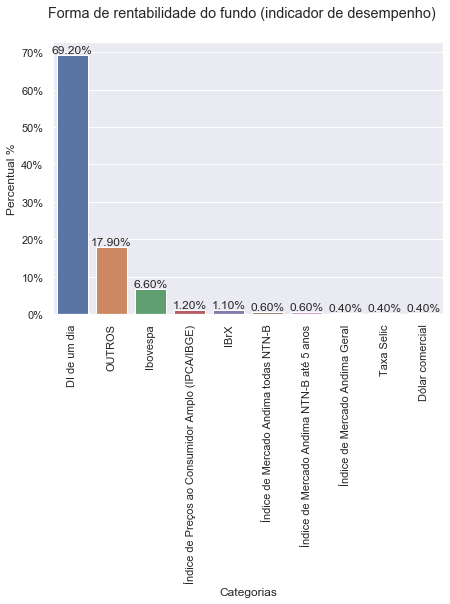

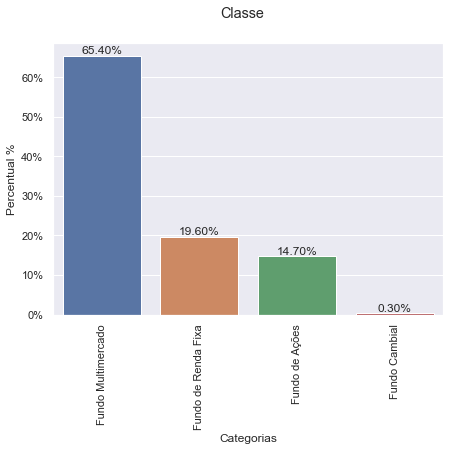

In [15]:
for column in ['Forma de rentabilidade do fundo (indicador de desempenho)', 'Classe']:
    gráficos(dist_freq_cat[column], column)

<p> Observa-se através do gráfico de "Classe" que quase dois terços (65,4%) dos fundos do mercado são multimercados, seguidos por fundos de renda fixa (19,6%), de ações (14,7%) e cambiais (0,3%). É interessante analisar este gráfico junto ao de "Forma de Rentabilidade do Fundo (Indicador de desempenho)", que apresenta qual o indicador / benchmark o fundo busca seguir (no caso de gestão passiva) ou superar (no caso de gestão ativa). O CDI aparece como principal indicador (69,3%), seguido de Outros (17,9%) e do ibovespa (6,6%). Vale destacar que todos os fundos apresentam algum valor na coluna "Classe" enquanto na coluna "Forma de Rentabilidade" mais de 3.000 não apresentam esta informação. </p>

<p> A seguir vamos investigar as colunas 'Fundo de cotas?', 'Forma de condomínio', 'Fundo exclusivo?' e 'Investidor Qualificado?' </p>

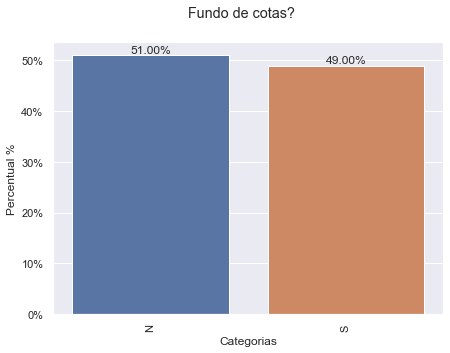

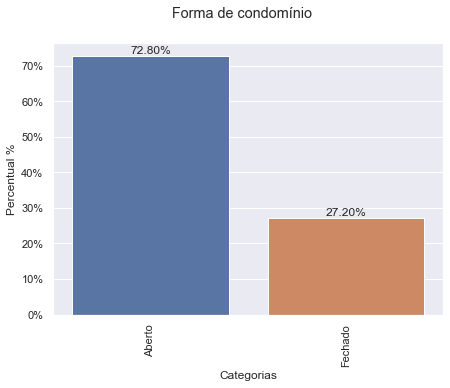

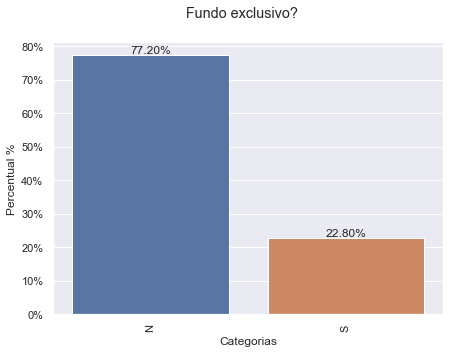

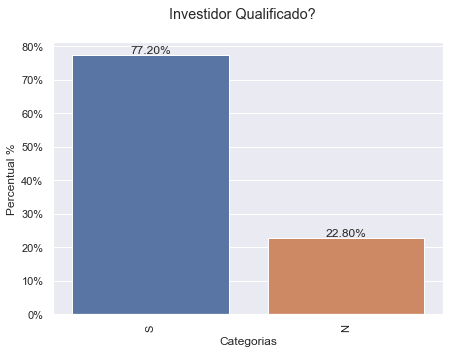

In [16]:
for column in ['Fundo de cotas?', 'Forma de condomínio', 'Fundo exclusivo?', 'Investidor Qualificado?']:
    gráficos(dist_freq_cat[column], column)

<p> O gráfico de "Fundos de Cotas?" indica que o dataset é dividido quase igualitariamente entre fundos de cotas (49%) quando comparado ao de FI's (51%). Já quanto a "Forma de condomínio", a maioria é composta por fundos abertos (72,8%) frente a fundos fechados (27,2%). O mesmo padrão é observado quanto aqueles fundos que não são exclusivos (77,2%) frente aqueles que o são (22,8%), assim como os grupos de fundos destinados a investidores qualificados (77,2%) ou não (22,8%). Poderemos entender se estas variáveis se relacionam ("Forma de condomínio", "Fundo exclusivo?" e "Investidor qualificado?") ao analisá-las em conjunto mais a frente. <p>

<p> Analisemos agora os prestadores de serviços para a indústria de fundos de investimento. Apesar de informativos, descartaremos os gráficos que apresentam o CNPJ no eixo x (de "Categorias") como em "CNPJ do Gestor", "CNPJ do auditor" e "CNPJ do administrador" para analisar apenas os respectivos gráficos com nomes, por serem mais auto-explicativos. </p>

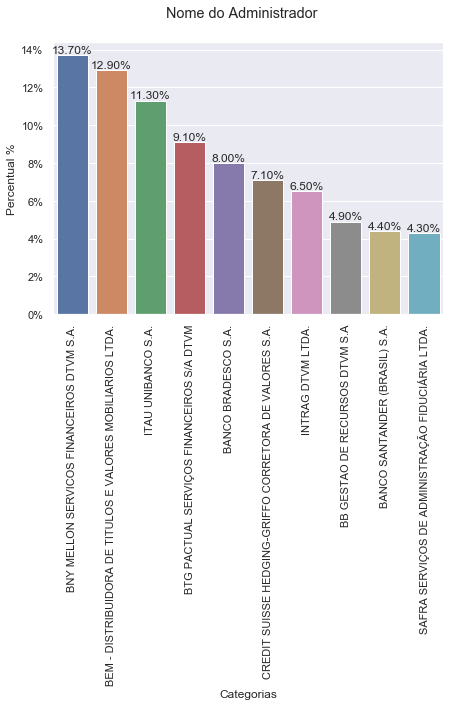

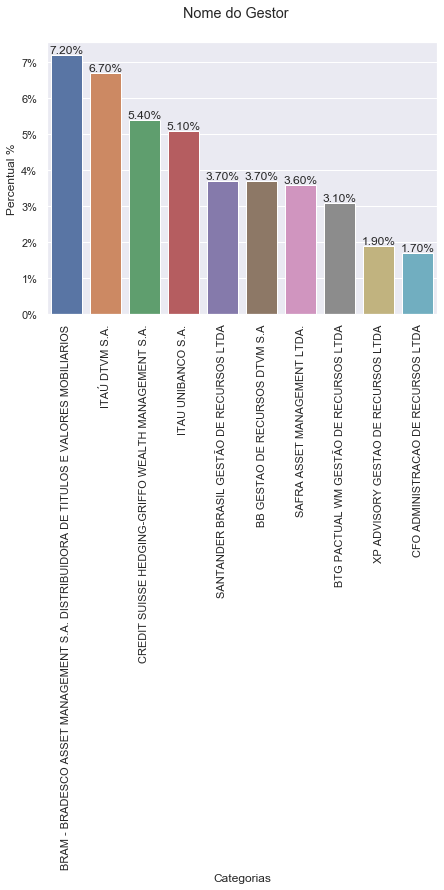

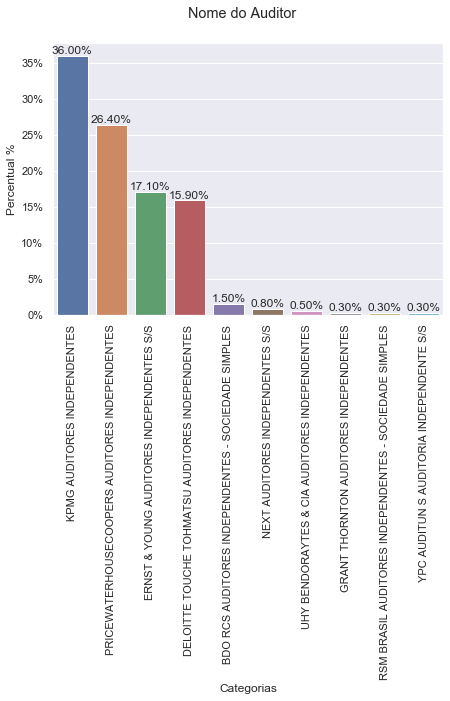

In [17]:
for column in ['Nome do Administrador', 'Nome do Gestor', 'Nome do Auditor']:
    gráficos(dist_freq_cat[column], column)

<p> Comecemos pelos administradores. Os 10 maiores participantes detêm 82,2% dos fundos do dataset, com a liderença da BNY Mellon com 13,7%, seguida pela BEM Distribuidora com 12,9% e o Itaú com 11,3%. Quando observamos os gestores, a indústria já é bem menos concentrada, com os 10 maiores perfazendo 42,1% dos fundos, com o maior percentual em 7,2% por parte da Bradesco Asset Management, 6,7% da Itaú DTVM e 5,4% da Credit Suisse Hedging Griffo. Por outro lado, quando observamos os auditores a concetração é muito maior, com 95,4% dos fundos auditados pelo grupo conhecido como Big Fours, com a liderança da KPMG com 36%, seguida pela PWC (26,4%), EY (17,1%) e Deloitte (15,9%). </p>

<p> Os últimos dois gráficos representam a tabela de frequência percentual das colunas 'Nome do Custodiante' e 'Nome do Controlador' </p>

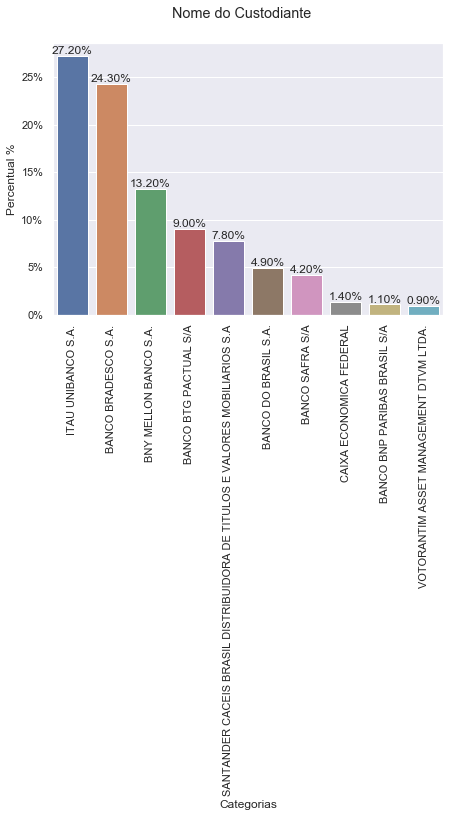

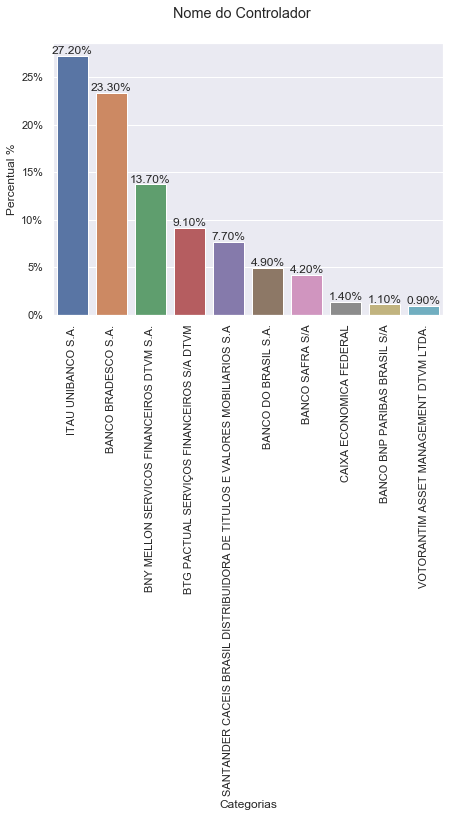

In [18]:
for column in ['Nome do Custodiante', 'Nome do Controlador']:
    gráficos(dist_freq_cat[column], column)

<p> Podemos perceber que as duas colunas apresentam gráficos bem parecidos, ambos com a liderança do Itaú com cerca de 27,20%, seguido de Bradesco com 23,30% e BNY Mellon com cerca de 13%.</p>

### 3.3 - Variáveis numéricas

<p> Vamos analisar agora as variáveis numéricas do dataset. Vamos relembrar quais são: </p>

In [19]:
pd.DataFrame(num_df.columns, columns = ["Colunas"])

,Colunas
0,Taxa de performance
1,Taxa de administração
2,Valor do patrimônio líquido


<p> Este dataset em específico apresenta poucas variáveis numéricas devido a sua própria natureza e objetivo, que é o de elencar as característcas dos fundos de investimento brasileiros. Por isso o mesmo apresenta uma quantidade de variáveis categóricas muito maior que a de numéricas. Mas isto não é um problema, teremos oportunidade de investigar outros datasets com maior quantidade de dados numéricos para explorar outros tipos de análise.  </p>

<p> Para um entendimento inicial sobre este tipo de variável o método .describe() é bastante interessante. O mesmo nos apresenta um resumo com 8 informações, como a quantidade de observações, o maior e o menor valor, a média, o desvio-padrão, e o 25º, 50º (ou mediana) e 75º percentil. </p>

<p> O código abaixo realiza estes cálculos para as 3 variáveis numéricas e apresenta seus resultados. </p>

In [20]:
resumo = num_df.describe()
resumo = resumo.style.format({'Taxa de performance': '{:.2f}', 'Taxa de administração': '{:.2f}', 'Valor do patrimônio líquido': 'R$ {:,.2f}'})
resumo

,Taxa de performance,Taxa de administração,Valor do patrimônio líquido
count,15228.00,15187.00,"R$ 17,857.00"
mean,3.30,84.92,"R$ 458,814,367.52"
std,8.83,3955.91,"R$ 3,358,622,788.82"
min,0.00,0.00,"R$ -4,540,653.58"
25%,0.00,0.10,"R$ 17,952,690.67"
50%,0.00,0.40,"R$ 49,954,489.15"
75%,0.00,1.00,"R$ 182,834,837.35"
max,120.00,450000.00,"R$ 253,621,871,827.70"


<p> Tais dados revelam de forma inicial a distribuição dos valores destas colunas. Investigaremos mais profundamente este tema quando mais a frente exibirmos os histogramas e gráficos box plot de cada variável. </p>

<p> Ainda assim, é interessante notar como os fundos podem alcançar valores de patrimônio líquido estratosféricos, como mais de R\$ 250 bilhões, ou até mesmo negativos, quando os mesmos enfrentam algum tipo de problema advindo das escolhas de investimento feitas. </p>

<p> Outra questão são os valores de taxa de performance e taxa de administração. Ambos apresentam valores baixíssimos até o 75º percentil, porém elevados valores máximos (analisaremos se estes são outliers ainda nesta seção). O método .head() a seguir e um pouco de entendimento de como estas taxas são utilizadas pelo mercado podem nos ajudar a entender o porquê de tais valores distoantes. </p>

<p> Resumidamente, a taxa de administração e de performance remuneram administrador e gestor pelos serviços prestados ao fundo, em geral calculadas como um percentual sobre o patrimônio líquido no período. São famosas as taxas 20% e 2% para administração e performance respectivamente, por exemplo. Porém estas não são as únicas formas de remunerar estes prestadores. Podem existir fundos que cobram um valor fixo anual, como R\$ 20.000, R\$ 50.000 ou R\$ 100.000. O que parece ocorrer aqui, visto tal discrepância entre os valores, é que tais colunas armazenam tanto valores em percentual como valores fixos absolutos em reais (R\$). Além disso, mesmo os valores em percentual parecem estar em escalas diferentes, como podemos ver abaixo. </p>

In [103]:
num_df_head = num_df.head()
num_df_head = num_df_head.style.format({'Taxa de performance': '{:.2f}', 'Taxa de administração': '{:.2f}', 'Valor do patrimônio líquido': 'R$ {:,.2f}'})
num_df_head

,Taxa de performance,Taxa de administração,Valor do patrimônio líquido
0,nan,nan,"R$ 150,010,617.16"
2,nan,nan,"R$ 149,819,463.06"
4,20.00,0.20,"R$ 24,370,770.19"
5,nan,nan,"R$ 4,764,181.00"
6,0.00,0.40,"R$ 17,074,376.51"


<p> Tais aparentes inconsistências serão dos principais motivos para mais a frente não nos aprofundarmos na análise das taxas de administração e de performance, nos dedicando apenas ao estudo do valor do patrimônio líquido dos fundos. </p>

<p> Vamos agora analisar a distribuição dos valores destas variáveis com os gráficos boxplots e histogramas. Visto o grande intervalo entre os valores mínimos e máximos das mesmas, utilizamos a escala em log para os eixos adequados, porém mesmo assim os gráficos ficaram distorcidos, conforme a seguir:</p>

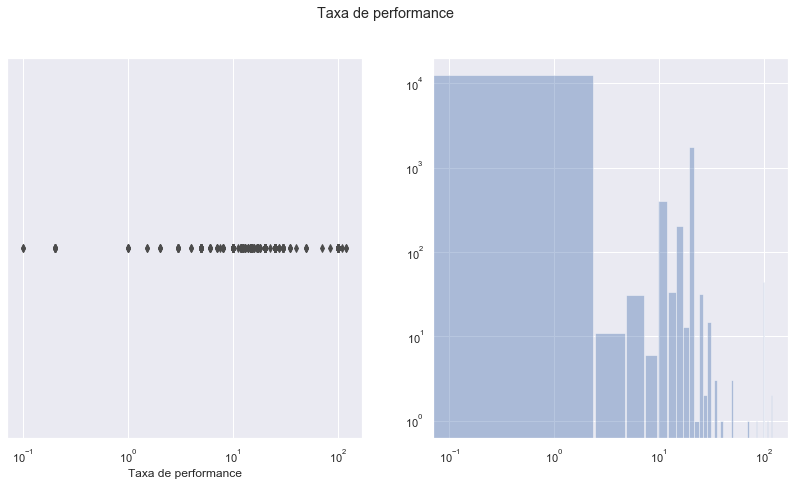

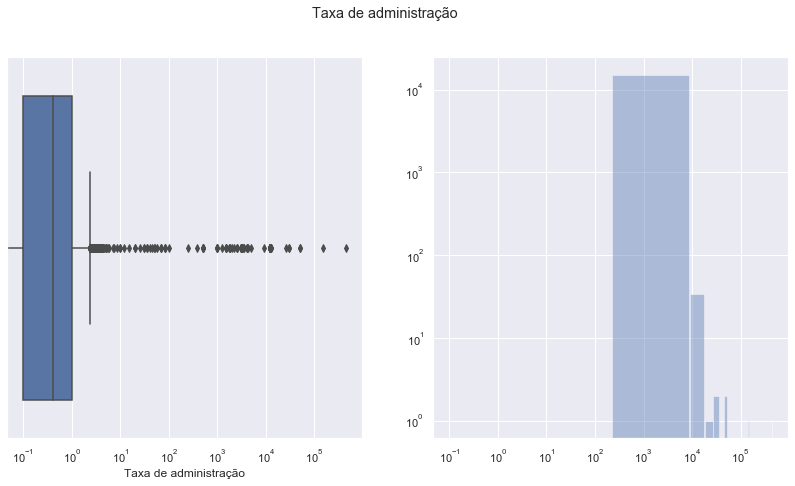

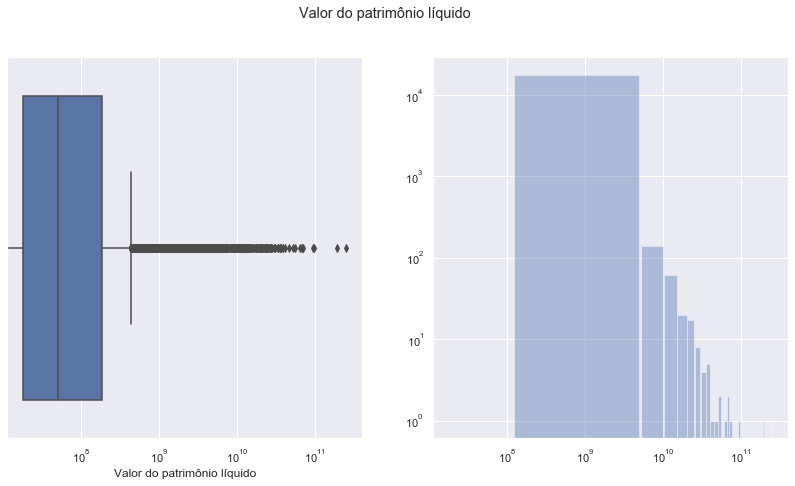

In [21]:
sns.set(style='darkgrid')
for column in num_df.columns:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
    plt.suptitle(column)
    
    b = sns.boxplot(num_df[column], ax = ax1)
    
    h = sns.distplot(num_df[column].dropna(), kde = False,  hist_kws={"rwidth":0.95}, axlabel = False, ax = ax2)
    h.set_yscale('log')
    h.set_xscale('log')

<p> Percebe-se que para as três variáveis há concentração da distribuição em torno de certos intervalos, porém a quantidade e os valores dos outliers são elevados, distorcendo assim os gráficos. Da mesma forma, outliers podem prejudicar nosso entendimento sobre um fenômeno específico ou ao utilizarmos modelos preditivos de qualquer espécie (caso sua existência se deva a erros na coleta dos dados, por exemplo). Por isso a identificação e o tratamento dos outliers é fundamental para etapas subsequentes de data science. Neste notebook focaremos apenas na identificação dos mesmos, visto que estamos apenas explorando e entendendo nossos dados, e não discutiremos sobre o tratamento de outliers, o qual é um vasto campo de discussão por si só. </p>

<p> Primeiramente vamos caracterizar os outliers. Estes são valores atípicos em uma distribuição, afastando-se consideravelmente das demais observações. São vários os métodos para se definir quais os outliers em um conjunto de dados, alguns destes utilizando ferramentas avançadas de machine learning, por exemplo. Utilizaremos, porém, uma metodologia mais simples para chegar a tais valores atípicos, utilizada inclusive para o desenho dos gráficos boxplot: a distância interquartil (IQ). A mesma é definida como a diferença entre o 1º e o 3º quartil de uma distribuição e a estes mesmos quartis são subtraídos e somados, respectivamente, o valor de 1,5 vezes a distância interquartil. Estes valores são os limites mínimos e máximos do gráfico boxplot, ou o limite das hastes em cada extremidade dos mesmos. Valores menores / maiores que estes limites são então considerados outliers. </p>

<p> As próximas duas linhas de código calculam os outliers para as três variáveis numéricas que estamos analisando e nos apresenta um resumo sobre estes achados. </p>

In [22]:
outliers = {}           
for column in num_df.columns:
    aux = num_df[column]
    q1, q3 = aux.quantile([.25, 0.75])
    iqr = q3 - q1
    outliers[column] = aux[(aux < (q1 - 1.5 * iqr)) | (aux > (q3 + 1.5 * iqr))]

In [23]:
resumo_outliers = pd.DataFrame(index = num_df.columns, columns = ['Quantidade Absoluto', 'Quantidade Únicos', '% Sobre Total Absoluto', '% Sobre Total Únicos'])
for column in outliers:
    resumo_outliers.loc[column, 'Quantidade Absoluto'] = outliers[column].count()
    resumo_outliers.loc[column, 'Quantidade Únicos'] = outliers[column].drop_duplicates().count()
    resumo_outliers.loc[column, '% Sobre Total Absoluto'] = outliers[column].count() / len(num_df[column])
    resumo_outliers.loc[column, '% Sobre Total Únicos'] = outliers[column].drop_duplicates().count() / len(num_df[column].drop_duplicates())

resumo_outliers = resumo_outliers.style.format({'Quantidade Absoluto': "{:d}", 'Quantidade Únicos': "{:d}", '% Sobre Total Absoluto': '{:.2%}', '% Sobre Total Únicos': '{:.2%}'})
resumo_outliers

,Quantidade Absoluto,Quantidade Únicos,% Sobre Total Absoluto,% Sobre Total Únicos
Taxa de performance,2610,37,14.60%,94.87%
Taxa de administração,628,82,3.51%,21.75%
Valor do patrimônio líquido,2514,2414,14.06%,13.99%


<p> Colunas com referencial "absoluto" são aquelas cujos valores considerados como outliers foram contados mais de uma vez, caso assim apareçam no dataset, enquanto as colunas "únicos" dizem respeito apenas a valores não duplicados. Este pequeno resumo nos permite concluir que, de fato, a quantidade de outliers para as três variáveis analisadas é bem alta. </p>
    
<p> Por exemplo, destacam-se os valores referentes às taxas de performance e de administração. Considerando-se valores únicos, apenas um dos valores não é considerado um outlier (a saber, zero) para a variável "taxa de performance". Claramente, esta variável apresenta uma distribuição muito específica, e maiores investigações devem ser feitas para melhor entender estes valores atípicos. Igualmente, cerca de 20% dos valores únicos da coluna "Taxa de administração" são outliers, apesar do percentual ser consideravelmente menor quando valores repetidos são considerados.  </p>

<p> Enquanto isso, a variável patrimônio líquido também apresenta grande quantidade de outliers, porém percentuais e quantidades muito próximas entre valores únicos e absolutos pois é muito mais raro que estes valores sejam exatamente iguais. Como curiosidade, vejamos os 10 valores mais discrepantes no código abaixo e, consequentemente, os maiores patrimônios da indústria. </p>

In [24]:
out_maiores = pd.DataFrame(outliers['Valor do patrimônio líquido'].sort_values(ascending = False).head(10))
out_maiores = out_maiores.style.format('R$ {:,.2f}')
out_maiores

,Valor do patrimônio líquido
30391,"R$ 253,621,871,827.70"
3817,"R$ 194,770,536,044.77"
7359,"R$ 99,284,075,657.35"
32546,"R$ 96,033,167,904.94"
21674,"R$ 71,485,416,122.55"
17782,"R$ 68,662,109,232.08"
6209,"R$ 67,987,079,192.26"
3610,"R$ 65,531,440,763.52"
7333,"R$ 55,199,874,892.29"
3711,"R$ 53,051,047,329.19"


<p> Finalizada esta relevante análise dos outliers, nossa próxima seção investigará a relação entre duas ou mais variáveis. </p>

### 3.4 - Análise bi e/ou multivariada

<p> A partir de agora vamos analisar não apenas as características / valores de variáveis isoladas, mas sim como elas se apresentam considerando outras variáveis. Vamos observar a interação tanto de variáveis categóricas com variáveis categóricas, de variáveis numéricas com categóricas e numéricas com numéricas </p>

<p> Comecemos com a análise de duas variáveis categóricas. Para isso utilizaremos tabelas de contingência, as quais apresentam a quantidade de observações dos grupos de uma variável categórica em função dos grupos da outra. </p>
    
<p> O código abaixo calcula a tabela para as variáveis "Forma de condomínio" e "Fundo exclusivo?". O python oferece como opção mostrar os totais dos grupos de cada variável nas margens da tabela e apresentar as observações em valores absolutos ou em porcentagem. Decidimos por elaborar a tabela sem valores totais nas margens e em porcentagem para facilitar a exibição dos gráficos que exibiremos em seguida. </p>

<p> Para exemplicar, vamos analisar as colunas "Forma de condomínio" e "Fundo exclusivo?" conjuntamente. </p>

In [25]:
cond_exc = pd.crosstab(info_cadastral_555_ativos['Forma de condomínio'], info_cadastral_555_ativos['Fundo exclusivo?'], margins = False, normalize = 'all')
cond_exc = cond_exc.style.format({'S': '{:.2%}', 'N': '{:.2%}'})
cond_exc

Fundo exclusivo?,N,S
Forma de condomínio,,
Aberto,54.98%,17.76%
Fechado,22.21%,5.04%


<p> A tabela acima nos mostra que dos cerca de 77% de fundos não exclusivos, 54% são abertos e 22% são fechados, enquanto dos 22% de fundos exclusivos, 17% são abertos e 5% são fechados. Naturalmente, tal análise / sentença pode ser feita de diferentes maneiras. Um gráfico de colunas empilhadas é uma boa escolha para entendermos visualmente esta relação. Como analisaremos diferentes conjuntos de variáveis, primeiramente definimos uma função e então plotamos o gráfico. </p>

In [31]:
def gráfico_colunas_empilhadas(df, título):    
    sns.set(style='darkgrid')
    fig = plt.figure(figsize = [7,5])
    df.data.plot(kind='bar', stacked=True)
    plt.suptitle(título)
    
    return plt.show()

<Figure size 504x360 with 0 Axes>

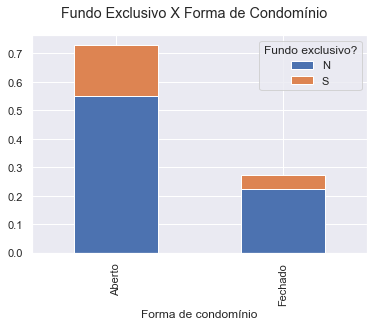

In [32]:
gráfico_colunas_empilhadas(cond_exc, 'Fundo Exclusivo X Forma de Condomínio')

<p> Nas próximas linhas vamos investigar a relação entre as colunas "Investidor qualificado?" e "Fundo exclusivo?", calculando primeiro a tabela de contigência e em seguida apresentando o gráfico. </p>

In [33]:
exc_quali = pd.crosstab(info_cadastral_555_ativos['Investidor Qualificado?'], info_cadastral_555_ativos['Fundo exclusivo?'], margins = False, normalize = 'all')
exc_quali = exc_quali.style.format({'S': '{:.2%}', 'N': '{:.2%}'})
exc_quali

Fundo exclusivo?,N,S
Investidor Qualificado?,,
N,22.73%,0.03%
S,54.47%,22.78%


<Figure size 504x360 with 0 Axes>

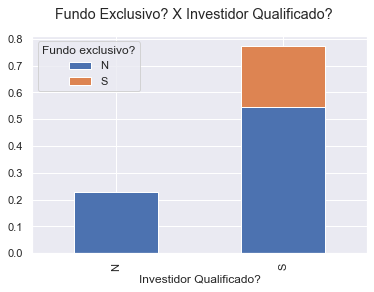

In [34]:
gráfico_colunas_empilhadas(exc_quali, 'Fundo Exclusivo? X Investidor Qualificado?')

<p> 

<p> A tabela e o gráfico nos revelam que praticamente todos os fundos destinados ao público em geral não são exclusivos. De acordo com a ICVM 555 fundos exclusivos são fundos para investidores profissionais constituídos para receber aplicações de um único cotista. Ou seja, ao menos a princípio seria um contrassenso existir um fundo exclusivo destinado ao público em geral. Deveríamos considerar uma inconsistência na base de dados ou uma exceção normativa, nesta ou em outra Instrução CVM, como explicação da existência destes fundos. </p>

<p> Podemos identificá-los e observar que são apenas 5 destes fundos com o código a seguir: </p>

In [71]:
i = info_cadastral_555_ativos.loc[(info_cadastral_555_ativos['Fundo exclusivo?'] == 'S') & (info_cadastral_555_ativos['Investidor Qualificado?'] == 'N')]
i

,CNPJ do fundo,Denominação Social,Data de registro,Data de constituição,Data de cancelamento,Situação,Data início da situação,Data de início de atividade,Data início do exercício social,Data fim do exercício social,...,Nome do Administrador,PF / PJ?,Código de identificação do gestor CPF/CNPJ,Nome do Gestor,CNPJ do Auditor,Nome do Auditor,CNPJ do Custodiante,Nome do Custodiante,CNPJ do Controlador,Nome do Controlador
2311,18.929.483/0001-79,AYMORÉ FUNDO DE INVESTIMENTO MULTIMERCADO CRÉD...,2013-09-24,2013-09-06,NaT,EM FUNCIONAMENTO NORMAL,2013-10-12,2013-10-12,2019-11-01,2020-10-31,...,MONETAR DISTRIBUIDORA DE TITULOS E VALORES MOB...,PJ,11.916.849/0001-26,OURO PRETO GESTÃO DE RECURSOS S.A.,05.452.311/0001-05,CONFIANCE AUDITORES INDEPENDENTES,62.285.390/0001-40,SOCOPA SOCIEDADE CORRETORA PAULISTA SA,62.285.390/0001-40,SOCOPA SOCIEDADE CORRETORA PAULISTA SA
20943,29.909.375/0001-50,IRON CAPITAL SPECIAL OPPORTUNITIES FUNDO DE IN...,2018-10-02,2018-03-06,NaT,EM FUNCIONAMENTO NORMAL,2019-07-15,2019-07-15,2020-01-01,2020-12-31,...,PLANNER CORRETORA DE VALORES SA,PJ,00.806.535/0001-54,PLANNER CORRETORA DE VALORES SA,54.276.936/0001-79,BDO RCS AUDITORES INDEPENDENTES - SOCIEDADE SI...,00.806.535/0001-54,PLANNER CORRETORA DE VALORES SA,00.806.535/0001-54,PLANNER CORRETORA DE VALORES SA
22842,32.395.694/0001-08,JAGUAR FUNDO DE INVESTIMENTO DE ACOES,2019-03-22,2019-03-22,NaT,EM FUNCIONAMENTO NORMAL,2019-03-22,2019-03-22,2019-07-01,2020-06-30,...,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,PJ,17.544.838/0001-49,TRILHA INVESTIMENTOS LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
26384,26.452.143/0001-28,NEW META FUNDO DE INVESTIMENTO MULTIMERCADO,2019-08-01,2016-08-26,NaT,EM FUNCIONAMENTO NORMAL,2019-08-01,2019-08-01,2019-08-01,2020-07-31,...,IDL TRUST SERVIÇOS FIDUCIÁRIOS LTDA.,PJ,18.606.232/0001-53,REAG GESTORA DE RECURSOS S.A,24.882.658/0001-32,YPC AUDITUN S AUDITORIA INDEPENDENTE S/S,03.751.794/0001-13,TERRA INVESTIMENTOS DISTRIBUIDORA DE TITULOS E...,03.751.794/0001-13,TERRA INVESTIMENTOS DISTRIBUIDORA DE TITULOS E...
35601,17.321.664/0001-55,VIRTUOSE - FUNDO DE INVESTIMENTO MULTIMERCADO ...,2020-01-13,2012-12-13,NaT,EM FUNCIONAMENTO NORMAL,2020-01-13,2020-01-13,2020-01-13,2020-11-30,...,BRL TRUST DISTRIBUIDORA DE TITULOS E VALORES M...,PJ,13.486.793/0001-42,BRL TRUST DISTRIBUIDORA DE TITULOS E VALORES M...,54.276.936/0001-79,BDO RCS AUDITORES INDEPENDENTES - SOCIEDADE SI...,13.486.793/0001-42,BRL TRUST DISTRIBUIDORA DE TITULOS E VALORES M...,13.486.793/0001-42,BRL TRUST DISTRIBUIDORA DE TITULOS E VALORES M...


<p> Por fim, destaca-se a relação quase de 1 para 4 entre a quantidade de fundos destinados a investidores qualificados frente ao público em geral, possibilitando assim ao primeiro grupo muito mais opções de investimento. Resumidamente investidores qualificados são aquelas pessoas físicas com patrimônio investido de mais de R$ 1 milhão, investidores institucionais, entre outros. Uma melhor definição dos tipos de investidores pode ser encontrada <a href="http://www.cvm.gov.br/legislacao/instrucoes/inst554.html">aqui</a> aqui no site da CVM. </p>

<p> Abaixo vamos avaliar a relação entre as variáveis "Forma de condomínio" e "Investidor Qualificado", novamente calculando a tabela de contigência e exibindo o respectivo gráfico. </p>

In [72]:
cond_quali = pd.crosstab(info_cadastral_555_ativos['Forma de condomínio'], info_cadastral_555_ativos['Investidor Qualificado?'], margins = False, normalize = 'all')
cond_quali = cond_quali.style.format({'S': '{:.2%}', 'N': '{:.2%}'})
cond_quali

Investidor Qualificado?,N,S
Forma de condomínio,,
Aberto,22.69%,50.06%
Fechado,0.06%,27.19%


<Figure size 504x360 with 0 Axes>

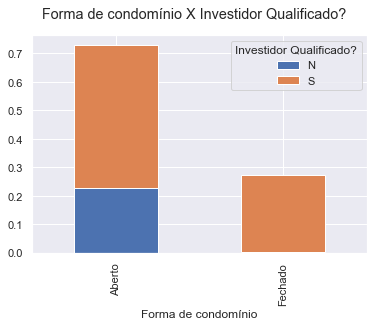

In [73]:
gráfico_colunas_empilhadas(cond_quali, 'Forma de condomínio X Investidor Qualificado?')

<p> Percebe-se que praticamente todos os fundos fechados são exclusivos para investidores qualificados, enquanto menos de um terço dos fundos abertos são destinados ao público em geral e o restante a investidores qualificados. </p>

<p> Aqui é importante perceber uma suposta limitação da base de dados da CVM quanto ao tipo de investidor segundo a Instrução CVM 555. Enquanto a referida instrução caracteriza os investidores como público geral, investidor qualificado e investidor profissional, nosso dataset apresenta apenas a coluna "Investidor Qualificado?" com valores "S" (Sim) ou "N" (Não), não apresentando assim quais seriam os fundos destinados exclusivamente a investidores profissionais, prerrogativa válida de acordo com a ICVM 555. </p>

<p> Para encerrarmos a análise de de duas variáveis categóricas, vamos investigar as variáveis "Classe" e "Forma de rentabilidade do fundo (indicador de desempenho)". 

In [74]:
classe_rent = pd.crosstab(info_cadastral_555_ativos['Classe'], info_cadastral_555_ativos['Forma de rentabilidade do fundo (indicador de desempenho)'], margins = False, normalize = 'all')
formato = {column:'{:.2%}' for column in classe_rent.columns}
classe_rent = classe_rent.style.format(formato)
classe_rent

Forma de rentabilidade do fundo (indicador de desempenho),Cota de PIBB,DI de um dia,Dólar comercial,Euro,IBrX,IBrX-50,IEE,IRF-M,Ibovespa,OUTROS,Ouro 250 gramas,Taxa Anbid,Taxa Referencial,Taxa Selic,Taxa de Juro de Longo Prazo,Taxa de juro prefixada,Índice Geral de Preços-Disponibilidade Interna (IGP-DI),Índice Geral de Preços-Mercado (IGP-M),Índice Nacional de Preços ao Consumidor (INPC/IBGE),Índice de Mercado Andima Geral,Índice de Mercado Andima LFT,Índice de Mercado Andima NTN-B até 5 anos,Índice de Mercado Andima NTN-B mais de 5 anos,Índice de Mercado Andima todas NTN-B,Índice de Mercado Andima todas NTN-C,Índice de Preços ao Consumidor (IPC/FIPE),Índice de Preços ao Consumidor Amplo (IPCA/IBGE),Índice de preços
Classe,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fundo Cambial,0.00%,0.01%,0.29%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.06%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
Fundo Multimercado,0.00%,54.33%,0.07%,0.00%,0.01%,0.01%,0.00%,0.01%,0.28%,10.06%,0.01%,0.01%,0.00%,0.08%,0.01%,0.08%,0.00%,0.06%,0.10%,0.06%,0.01%,0.16%,0.02%,0.03%,0.00%,0.02%,0.52%,0.01%
Fundo de Ações,0.02%,0.63%,0.00%,0.00%,1.12%,0.12%,0.01%,0.00%,6.34%,2.98%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.10%,0.00%,0.01%,0.00%,0.03%,0.01%,0.01%,0.00%,0.00%,0.34%,0.01%
Fundo de Renda Fixa,0.00%,14.28%,0.01%,0.00%,0.00%,0.00%,0.00%,0.27%,0.00%,4.79%,0.00%,0.00%,0.01%,0.31%,0.00%,0.03%,0.00%,0.07%,0.10%,0.38%,0.01%,0.41%,0.26%,0.60%,0.01%,0.00%,0.36%,0.04%


<p> Desta vez vamos filtrar os dados para apresentar um gráfico mais resumido, visto a grande quantidade de grupos possíveis para a variável "Forma de Rentabilidade". Conforme observamos nos gráficos da sessão "3.2 - Variáveis categóricas", os grupos "DI de um dia", "Outros" e "Ibovespa" perfazem 93,8% das ocorrências para esta variável. Filtremos portanto apenas estes valores e vamos plotar o gráfico a seguir. </p>

<Figure size 720x720 with 0 Axes>

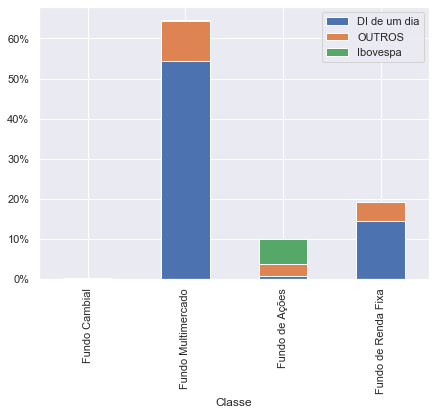

In [75]:
sns.set(style='darkgrid')
fig = plt.figure(figsize = (10,10))
classe_rent.data = classe_rent.data.filter(items = ['DI de um dia', 'OUTROS', 'Ibovespa'])
g = classe_rent.data.plot(kind='bar', stacked=True, figsize = (7,5), legend = False)
g.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend(loc='upper right')
plt.show()

<p> Este gráfico nos traz alguns insights interessantes. Primeiro que a grande maioria (54.33% de um total de cerca de 65%) dos fundos multimercados tem o CDI como indicador de desempenho, apesar de fundos desta classe poderem investir em ativos de diferentes fatores de risco, como juros, moeda, mercado acionário, commodities, entre outros. Ou seja, os mesmos podem se expor a diferentes riscos porém seu benchmark, em sua maioria, ainda é o CDI, principal taxa de referência para ativos de renda fixa. Destaca-se que, ao menos de acordo com a base de dados, nenhum fundo multimercado utiliza como indicador de desempenho o índice IHFA ou IFMM, índices estes divulgados pela ANBIMA e o Banco BTG Pactual, respectivamente, com o objetivo de monitorar o desempenho dos hedge funds brasileiros. </p> 
    
<p> Para finalizar, percebe-se que até mesmo um pequeno percentual dos fundos de ações também utilizam o CDI como benchmark. Um lado negativo para todos os grupos de classes é o elevado percentual de "Outros", dificultando uma melhor análise. </p>

<p> A seguir vamos analisar como duas variáveis numéricas se relacionam. Enquanto gráficos de dispersão são ótimas formas de visualmente identificarmos estas relações, o coeficiente de correlação é sua expressão matemática. Podemos calculá-lo e apresentar a matriz de correlação para todas as variáveis numéricas. </p>

<p> Comecemos pelos gráficos de dispersão. Aqui novamente a escala dos eixos foi alterada para log devido ao grande intervalo de dados. </p>

In [76]:
def scatter (eixo_x, eixo_y, df):
    fig = plt.figure(figsize = [7,5])
    g = sns.scatterplot(eixo_x, eixo_y, data = df)
    g.set_xticklabels(rotation=90, labels = eixo_x)
    g.set_yscale('symlog')
    g.set_xscale('symlog')
    
    return plt.show()

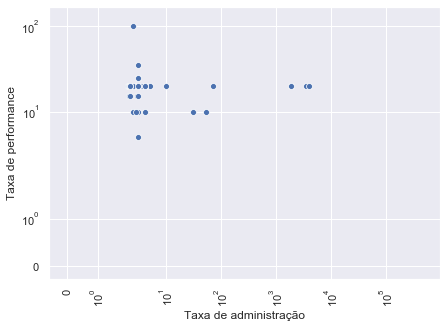

In [77]:
scatter (num_df['Taxa de administração'], num_df['Taxa de performance'], num_df)

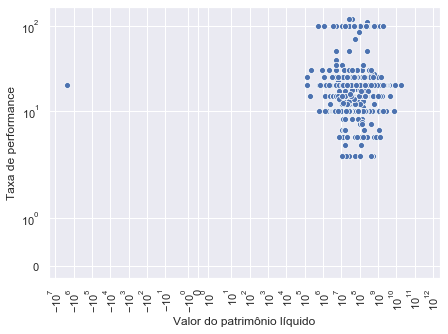

In [78]:
scatter (num_df['Valor do patrimônio líquido'], num_df['Taxa de performance'], num_df)

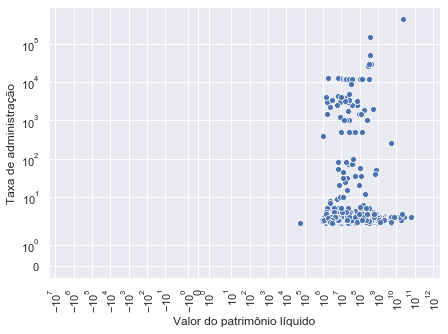

In [79]:
scatter (num_df['Valor do patrimônio líquido'], num_df['Taxa de administração'], num_df)

<p> Através da análise dos gráficos de dispersão, não nos parece haver uma relação clara entre as variáveis. Vejamos o que a matriz de correlação nos revela: </p>

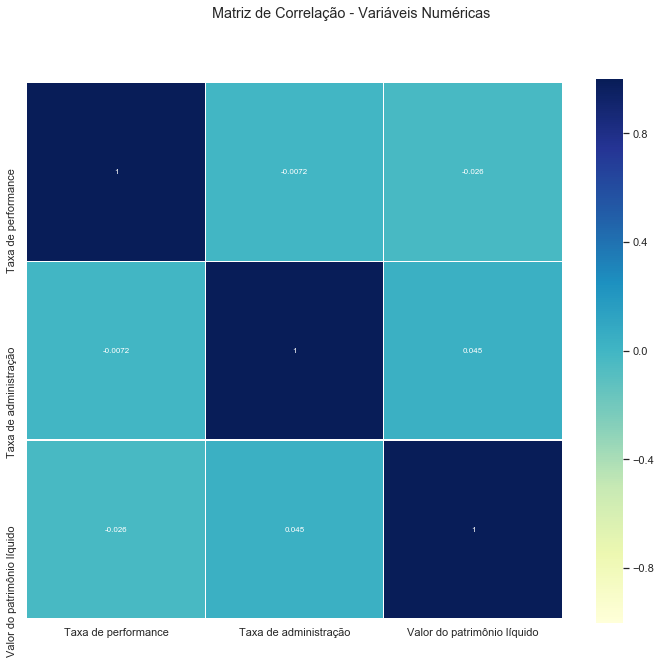

In [80]:
correlation = num_df.corr()
plt.figure(figsize=(12, 10))
plt.suptitle("Matriz de Correlação - Variáveis Numéricas")
sns.heatmap(data = correlation, cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
         annot=True, annot_kws={"size": 8}, square=True)

<p> Como podemos perceber, os coeficientes de correlação entre as variáveis são bem próximos de zero, atestando que de fato as mesmas praticamente não apresentam correlação.</p>

<p> A partir de agora analisaremos a combinação de uma variável categórica com uma variável numérica. Como dita na análise apenas de variáveis numéricas, consideraremos apenas a interação das váriaveis categóricas com a variável numérica de "valor do patrimônio líquido" pois as variáveis "taxa de administração" e "taxa de performance" parecem apresentar valores em diferentes escalas. </p>

<p> Para estas análises vamos introduzir um novo método, o .gropby(). O mesmo agrupa o dataset de acordo com uma coluna ou parâmetro específico, no qual podemos performar um cálculo ou aplicar uma função, e em seguida nos exibe o resultado. Nosso objetivo é agrupar o patrimônio líquido dos fundos por classe, administrador, gestor, auditor, custodiante e controlador para saber quais destes prestadores de serviço são os maiores de acordo com o total do patrimônio líquido dos fundos sob sua responsabilidade. Destacamos que esta análise se difere da realizada na sessão "3.2 - Variáveis categóricas" pois ali são totalizadas as quantidades de fundos somente, independentes do valor do patrimônio líquido de cada fundo, enquanto aqui levaremos em consideração esta importante medida. </p>

<p> Como buscamos realizar a mesma tarefa repetidamente ou seja, desejamos o mesmo output porém mudando os imputs necessários, vamos definir uma função "resumo", e uma função "gráfico_de_barras". O código abaixo define estas duas funções.</p>

In [81]:
def resumo(df, agrupar):
    
    df = df.groupby([agrupar]).sum().round(10)
    df = df.nlargest(10, columns = 'Valor do patrimônio líquido').reset_index()
    df['Percentual %'] = None

    for x in df.index:
        df.loc[x, 'Percentual %'] = df.loc[x, 'Valor do patrimônio líquido'] / info_cadastral_555_ativos_fi['Valor do patrimônio líquido'].sum()

    df = df.style.format({'Valor do patrimônio líquido': 'R$ {:,.2f}', 'Percentual %': '{:.2%}'})
    
    return df

def gráfico_de_barras (eixo_x, eixo_y, dados):
    sns.set(style='darkgrid')
    fig = plt.figure(figsize = [7,5])
    g = sns.barplot(x = dados[eixo_x][:20], y = dados[eixo_y][:20], data = dados)
    g.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    g.set_xticklabels(rotation=90, labels = dados[eixo_x])

    return plt.show()

<p> Antes de avançarmos com a análise do patrimônio líquido dos fundos é importante distinguir e investigar em separado dois tipos de fundos, a saber: fundos de cotas (FIC's, ou da sigla em inglês fif's, de fund of funds) e fundos de investimento tradicionais. Visto que o primeiro grupo investe em outros fundos, convencionou-se retirar o total do patrimônio destes fundos quando analisados os valores de toda a indústria para evitar dupla contagem. 
    
<p> Para esclarecer, podemos citar como exemplo o seguinte cenário: um FIC com patrimônio de R\$ 1 bilhão de reais que investe em um fundo de ações com patrimônio de R\$ 1,5 bilhão. Caso não retirássemos o FIC, chegaríamos erroneamnete ao valor de R\$ 2,5 bilhões de recursos geridos, enquanto na verdade este valor é de apenas R\$ 1,5 bilhão, pois R\$ 1 bilhão do patrimônio do fundo de ações se constitui dos recursos do FIC. Por isso a exclusão destes fundos, para que não distorça nossos cálculos. </p>
    
<p> Portanto, para prosseguirmos com a análise do patrimônio líquido, vamos filtrar apenas os FI's e descartar os FIC's com o código abaixo: </p>

In [82]:
info_cadastral_555_ativos_fi = info_cadastral_555_ativos[info_cadastral_555_ativos['Fundo de cotas?'] == 'N']

<p> Vamos começar nossa análise com a coluna de "Classe" dos fundos. Anteriormente exibimos um gráfico boxplot para o valor do patrimônio líquido de todas as classes em conjunto. Abaixo, vejamos se as distribuições de cada classe em separado são significativamente diferentes: </p>

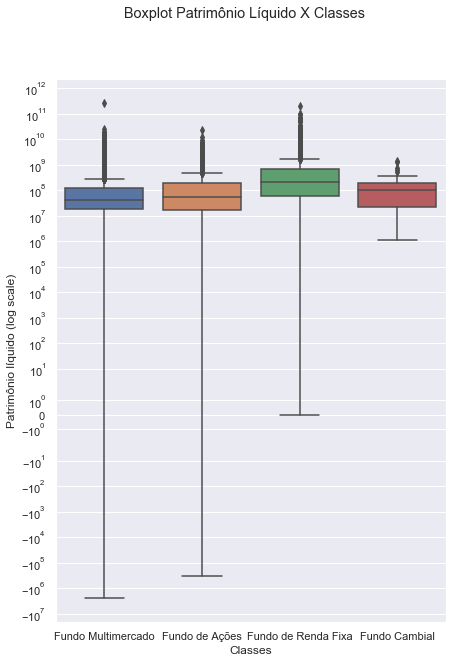

In [83]:
fig = plt.figure(figsize = [7,10])
g = sns.boxplot(x = 'Classe', y = 'Valor do patrimônio líquido', data = info_cadastral_555_ativos_fi[['Valor do patrimônio líquido', 'Classe']])
plt.xlabel('Classes')
plt.ylabel('Patrimônio líquido (log scale)')
plt.suptitle('Boxplot Patrimônio Líquido X Classes')
plt.yscale('symlog')
plt.show()

<p> Percebe-se que o grupo de fundos cambiais e de renda fixa tem uma menor dispersão de seus valores de patrimônio líquido quando comparados com os demais fundos. Todos, porém, em maior ou menor escala, apresentam outliers, sendo que apenas fundos multimercados e de ações apresentam fundos com patrimônio líquido negativo. </p>

<p> Vejamos a seguir, através de tabela e gráficos de barra, quais as classes de fundos mais representativas segundo seu patrimônio líquido total. </p>

In [84]:
classe = resumo(info_cadastral_555_ativos_fi[['Valor do patrimônio líquido', 'Classe']], 'Classe')
classe

,Classe,Valor do patrimônio líquido,Percentual %
0,Fundo de Renda Fixa,"R$ 2,962,098,262,907.59",59.58%
1,Fundo Multimercado,"R$ 1,573,101,505,288.92",31.64%
2,Fundo de Ações,"R$ 429,722,071,400.99",8.64%
3,Fundo Cambial,"R$ 6,977,381,877.96",0.14%


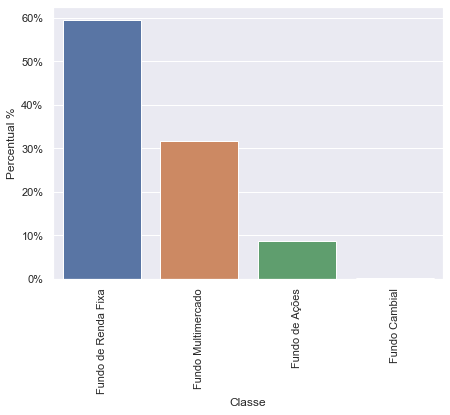

In [85]:
gráfico_de_barras ('Classe', 'Percentual %', classe.data)

<p> Um último passo antes de nossa análise é ver o total do patrimônio líquido de todos os fundos ativos na indústria através do código abaixo: </p>

In [322]:
total = info_cadastral_555_ativos_fi['Valor do patrimônio líquido'].sum()
'R$ {:,.2f}'.format(total)

'R$ 4,973,007,819,253.39'

<p> As três últimas sequências de códigos nos trazem muitas informações relevantes. Começando com a última linha, vemos que em 30/04/2020 o patrimônio líquido total da indústria de fundos de investimento brasileira é de pouco menos de R\$ 5 trilhões. A superação desta marca simbólica ocorreu em Junho de 2019, conforme <a href="https://www.anbima.com.br/pt_br/noticias/industria-de-fundos-alcanca-r-5-trilhoes-de-patrimonio-liquido.htm">link aqui</a> da ANBIMA (Associação Brasileira das Entidades dos Mercados Financeiro e de Capitais), porém tudo indica que os eventos recentes relacionados ao coronavírus e a subsequente crise no mercado de capitais reduziram o patrimônio líquido total abaixo desta marca. </p>

<p> Outra constatação interessante a se fazer é que a classe de fundos de renda fixa é a maior em total do patrimônio com quase o dobro da segunda colocada (de fundos multimercado), enquanto esta última classe perfazia 65,40 \% do total quando considerado apenas a quantidade dde fundos. Por fim, vale destacar que os fundos de ações ainda correspondem a pequena fração do total, mesmo após as sucessivas reduções na taxa básica de juros da economia, o que em teoria favoreceria aplicações neste tipo de fundo e em renda variável em geral frente a fundos e ativos de renda fixa. </p>

<p> Seguimos agora com a análise por administrador: </p>

In [86]:
admin = resumo(info_cadastral_555_ativos_fi[['Valor do patrimônio líquido', 'Nome do Administrador']], 'Nome do Administrador')
admin

,Nome do Administrador,Valor do patrimônio líquido,Percentual %
0,BB GESTAO DE RECURSOS DTVM S.A,"R$ 1,049,347,282,899.75",21.11%
1,ITAU UNIBANCO S.A.,"R$ 664,610,174,011.90",13.37%
2,BANCO SANTANDER (BRASIL) S.A.,"R$ 473,631,029,120.63",9.53%
3,BANCO BRADESCO S.A.,"R$ 464,946,339,050.28",9.35%
4,INTRAG DTVM LTDA.,"R$ 455,056,899,382.85",9.15%
5,CAIXA ECONOMICA FEDERAL,"R$ 431,204,936,746.88",8.67%
6,BEM - DISTRIBUIDORA DE TITULOS E VALORES MOBILIARIOS LTDA.,"R$ 386,558,545,532.65",7.77%
7,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,"R$ 308,206,313,261.63",6.20%
8,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,"R$ 150,169,757,843.04",3.02%
9,CREDIT SUISSE HEDGING-GRIFFO CORRETORA DE VALORES S.A.,"R$ 103,731,036,447.51",2.09%


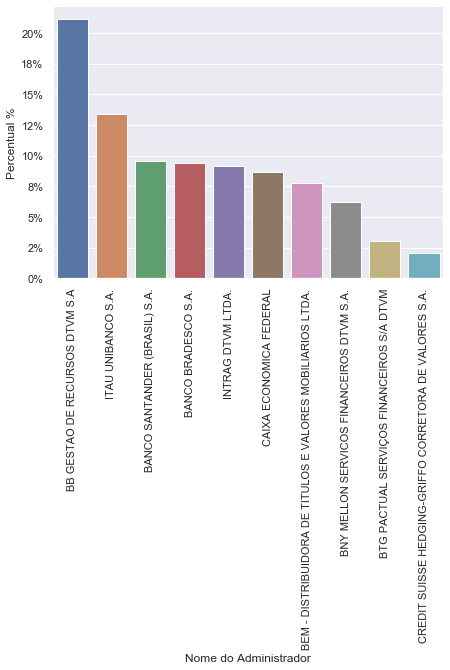

In [87]:
gráfico_de_barras ('Nome do Administrador', 'Percentual %', admin.data)

<p> Banco do Brasil e Itaú (21,10% e 13.36%, respecitvamente) aparecem como os maiores administradores e se distanciam do restante do grupo, com o primeiro superando a marca de R$ 1 trilhão sob administração. Aqui novamente, os administradores líderes em quantidade de fundos (BNY Mellon e Bradesco BEM DTVM, com 13.70% e 12.90%, respectivamente) são apenas o oitavo e sétimo quando o critério é o total do patrimônio administrado. </p>

<p> Importante notar que alguns admiistradores fazem parte do mesmo grupo econômico, o que poderia alterar a ordem do ranking. Intrag DTVM LTDA e  Itaú Unibanco S.A. fazem parte do mesmo grupo, por exemplo, assim como o Banco Bradesco S.A. e a BEM - DTVM LTDA. Por simplificação, preferimos manter o ranking como está. Esta mesma constatação pode ocorrer com as análises subsequentes, e adotaremos a mesma medida. </p> 

<p> Vejamos os maiores gestores com as próximas duas linhas de código. </p>

In [88]:
gestor = resumo(info_cadastral_555_ativos_fi[['Valor do patrimônio líquido', 'Nome do Gestor']], 'Nome do Gestor')
gestor

,Nome do Gestor,Valor do patrimônio líquido,Percentual %
0,BB GESTAO DE RECURSOS DTVM S.A,"R$ 1,049,218,852,226.87",21.10%
1,ITAU UNIBANCO S.A.,"R$ 593,782,163,270.23",11.94%
2,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBUIDORA DE TITULOS E VALORES MOBILIARIOS,"R$ 488,287,669,868.38",9.82%
3,CAIXA ECONOMICA FEDERAL,"R$ 369,136,832,659.44",7.42%
4,BANCO SANTANDER (BRASIL) S.A.,"R$ 265,081,574,072.94",5.33%
5,SANTANDER BRASIL GESTÃO DE RECURSOS LTDA,"R$ 242,336,869,799.86",4.87%
6,ITAÚ DTVM S.A.,"R$ 106,920,550,115.44",2.15%
7,BW GESTÃO DE INVESTIMENTOS LTDA.,"R$ 68,810,876,711.88",1.38%
8,CREDIT SUISSE HEDGING-GRIFFO WEALTH MANAGEMENT S.A.,"R$ 68,005,079,302.94",1.37%
9,SAFRA ASSET MANAGEMENT LTDA.,"R$ 61,274,261,724.69",1.23%


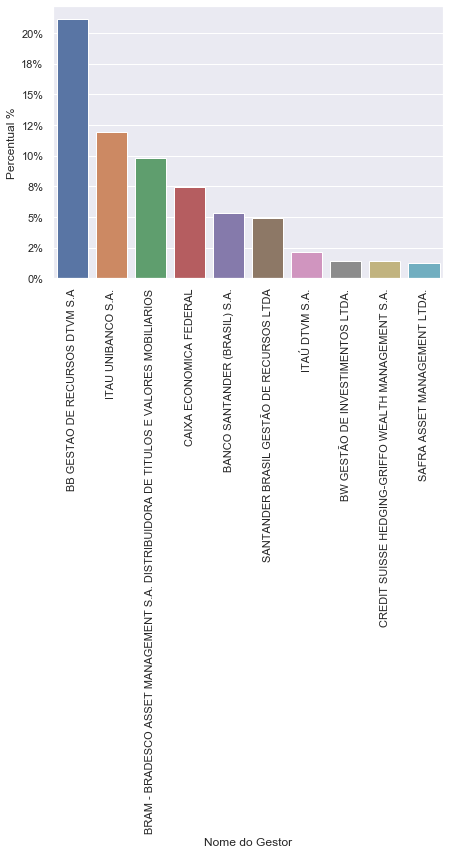

In [89]:
gráfico_de_barras ('Nome do Gestor', 'Percentual %', gestor.data)

<p> Percebemos que, novamente, os grandes conglomerados financeiros do país são os líderes em gestão de fundos quando o critério é o total do patrimônio. Por este critério as diferenças entre os gestores são mais marcantes do que quando comparado com o critério de quantidade de fundos. Enquanto neste último critério a diferença entre o primeiro e o quarto colocado é de apenas 2,10%, quando consideramos o total de recursos sob gestão essa diferença chega a 13,68%. </p>

<p> Os últimos anos viram um grande crescimento das chamadas gestoras independentes (não vinculadas aos grandes bancos), conforme <a href="https://www.infomoney.com.br/onde-investir/com-captacao-maior-que-a-dos-bancos-gestoras-independentes-devem-crescer-com-fundos-imobiliarios-e-previdencia/">aqui</a>, porém tal crescimento não parece ameaçar a liderança dos grandes conglomerados, que ainda representam 66% do mercado de gestão (10 maiores). <p>

<p> Abaixo, vejamos o ranking de auditores segundo o total de patrimônio líquido auditado. </p>

In [92]:
auditor = resumo(info_cadastral_555_ativos_fi[['Valor do patrimônio líquido', 'Nome do Auditor']], 'Nome do Auditor')
auditor

,Nome do Auditor,Valor do patrimônio líquido,Percentual %
0,KPMG AUDITORES INDEPENDENTES,"R$ 2,212,095,902,001.29",44.49%
1,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES,"R$ 1,264,957,075,693.09",25.44%
2,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENTES,"R$ 825,797,923,243.97",16.61%
3,ERNST & YOUNG AUDITORES INDEPENDENTES S/S,"R$ 592,461,607,768.61",11.92%
4,BDO RCS AUDITORES INDEPENDENTES - SOCIEDADE SIMPLES,"R$ 36,442,685,368.23",0.73%
5,YPC AUDITUN S AUDITORIA INDEPENDENTE S/S,"R$ 9,309,399,755.25",0.19%
6,AUDIPEC AUDITORIA E PERÍCIA CONTÁBIL S/S,"R$ 8,368,127,940.36",0.17%
7,NEXT AUDITORES INDEPENDENTES S/S,"R$ 6,815,563,551.63",0.14%
8,UHY BENDORAYTES & CIA AUDITORES INDEPENDENTES,"R$ 3,986,568,350.91",0.08%
9,BAKER TILLY 4PARTNERS AUDITORES INDEPENDENTES S/S,"R$ 2,635,768,712.94",0.05%


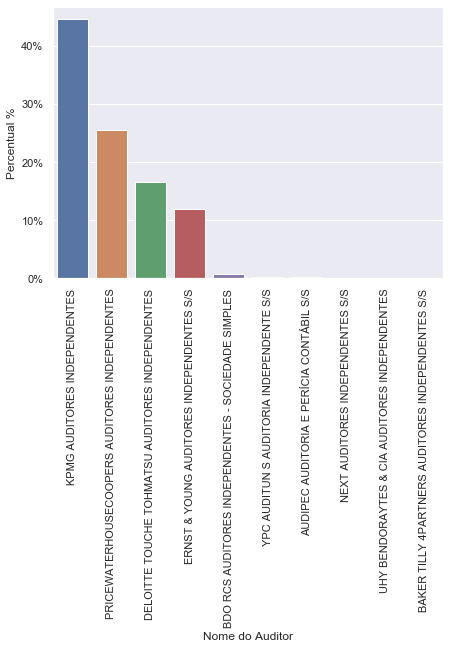

In [93]:
gráfico_de_barras ('Nome do Auditor', 'Percentual %', auditor.data)

<p> Novamente a análise dos auditores aponta para enorme concentração da indústria nas Big Fours, as quais respondem por 98,46% do patrimônio total auditado, número bem próximo aos 95,4% encontrado quando o critério utilizado foi a quantidade de fundos. De novo KPMG e PWC lideram, com 44.50% e 25.44%, respectivamente, seguidos por Deloitte e EY com 16.61% e 11.91%.</p>

<p> Por fim, vejamos a análise dos custodiantes e controladores em sequência, visto que ambos apresentaram valores bem próximos na análise anterior de variáveis categóricas. </p>

In [94]:
custodiante = resumo(info_cadastral_555_ativos_fi[['Valor do patrimônio líquido', 'Nome do Custodiante']], 'Nome do Custodiante')
custodiante

,Nome do Custodiante,Valor do patrimônio líquido,Percentual %
0,ITAU UNIBANCO S.A.,"R$ 1,247,445,274,836.69",25.09%
1,BANCO BRADESCO S.A.,"R$ 1,058,709,495,149.39",21.29%
2,BANCO DO BRASIL S.A.,"R$ 1,042,909,452,986.16",20.98%
3,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITULOS E VALORES MOBILIARIOS S.A,"R$ 559,884,821,941.76",11.26%
4,BNY MELLON BANCO S.A.,"R$ 297,473,179,932.19",5.98%
5,CAIXA ECONOMICA FEDERAL,"R$ 278,010,160,103.52",5.59%
6,BANCO BTG PACTUAL S/A,"R$ 146,319,839,063.91",2.94%
7,BANCO SAFRA S/A,"R$ 86,561,533,108.36",1.74%
8,BANCO BNP PARIBAS BRASIL S/A,"R$ 42,307,817,486.33",0.85%
9,BANCO COOPERATIVO SICREDI S.A.,"R$ 38,145,650,070.28",0.77%


In [96]:
controlador = resumo(info_cadastral_555_ativos_fi[['Valor do patrimônio líquido', 'Nome do Controlador']], 'Nome do Controlador')
controlador

,Nome do Controlador,Valor do patrimônio líquido,Percentual %
0,ITAU UNIBANCO S.A.,"R$ 1,269,878,913,423.60",25.54%
1,BANCO BRADESCO S.A.,"R$ 1,044,897,080,125.37",21.02%
2,BANCO DO BRASIL S.A.,"R$ 1,043,575,637,890.14",20.99%
3,SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITULOS E VALORES MOBILIARIOS S.A,"R$ 560,624,129,303.83",11.28%
4,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,"R$ 312,248,994,891.39",6.28%
5,CAIXA ECONOMICA FEDERAL,"R$ 278,010,160,103.52",5.59%
6,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,"R$ 147,611,456,139.41",2.97%
7,BANCO SAFRA S/A,"R$ 86,608,240,443.20",1.74%
8,BANCO BNP PARIBAS BRASIL S/A,"R$ 42,307,817,486.33",0.85%
9,BANCO COOPERATIVO SICREDI S.A.,"R$ 38,424,780,426.07",0.77%


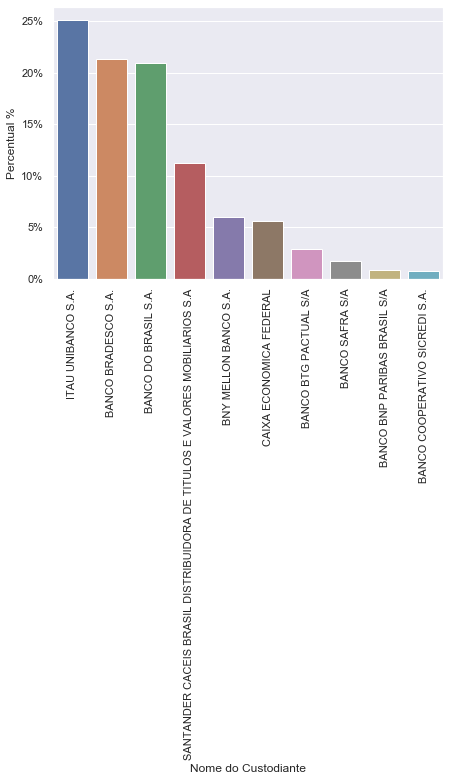

In [98]:
gráfico_de_barras ('Nome do Custodiante', 'Percentual %', custodiante.data)

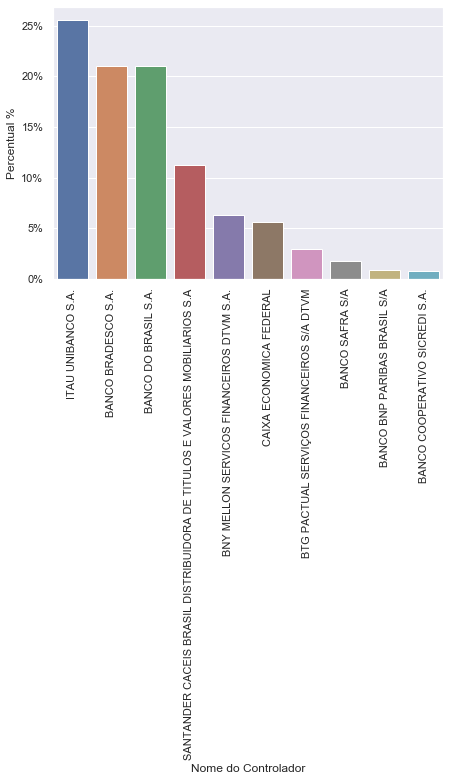

In [99]:
gráfico_de_barras ('Nome do Controlador', 'Percentual %', controlador.data)

<p> Podemos atestar que estas duas variáveis apresentam valores bastante semelhantes, e que a ordenação, seja pelo critério do patrimônio líquido ou da quantidade de fundos, se mantêm muito parecida seja qual for o critério. Itaú e Bradesco são os líderes, nesta ordem, em ambos, além de serem os únicos com mais de 20% de participação. </p>

## 4 - Conclusão

<p> Ao começar a escrever este primeiro notebook, tinha alguns objetivos em mente. Um deles foi de colocar em prática algumas das habilidades de programação recém-aprendidas, utilizando uma base de dados real e cujo tema me interessasse. E creio que este objetivo foi alcançado com sucesso! Espero que tenha sido tão divertido para você ler como foi para mim programar em python e escrever sobre a indústria de fundos de investimento brasileira. </p>

<p> Através da base de dados da CVM conseguimos melhor entender as particularidades desta indústria tão importante para nossa economia, mesmo sabendo que as informações aqui contidas são apenas uma pequena fração do todo. Inúmeras outras análises podem ser feitas com esta ou outras bases, ou com o cruzamento de várias. Este é certamente apenas o pontapé inicial de uma jornada de curiosidade, experimentação com os dados e desejo contínuo de aprender cada vez mais sobre o mercado financeiro. </p>
    
<p> Até a próxima! </p>